# Import preprocessed data

In [4]:
%pip help


Usage:   
  C:\Users\MGAJ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requir

In [1]:
from tqdm import tqdm
import numpy as np
from src.structures import User, Movie
from src.data_methods import read_movies,read_viewers
import kagglehub
import os

In [ ]:
# Download latest version
#please ikke offentliggør min api key. 
os.environ['KAGGLE_USERNAME'] = "marcusgaleajacobsen"
os.environ['KAGGLE_KEY'] = "32a3003f52c97053841ea46c492128dc"
datapath = kagglehub.dataset_download("netflix-inc/netflix-prize-data")

: 

In [ ]:
n_lines = np.inf #number of reviews to read
datafiles = ["combined_data_1.txt"]#, "combined_data_2.txt", "combined_data_3.txt", "combined_data_4.txt"]
with_tqdm = True #set to True to see progress bar (reduce speed)
reviews_pr_user = 10 #number of reviews per user to read

movies = read_movies(datapath)
users = read_viewers(datapath, movies, datafiles = datafiles, with_tqdm= with_tqdm, n_lines=n_lines,)# reviews_pr_user=reviews_pr_user) #read only 100000 

In [ ]:
#trim users with less than 10 movies
not_enough_movies = [id for id,user in users.items() if user.n_watched < 200]
for user_id in not_enough_movies:
    del users[user_id]

In [ ]:
len(users)

21045

In [ ]:
users

defaultdict(src.structures.User,
            {'1488844': User(1488844) has rated 529 movies,
             '30878': User(30878) has rated 309 movies,
             '1248029': User(1248029) has rated 338 movies,
             '372233': User(372233) has rated 259 movies,
             '1080361': User(1080361) has rated 322 movies,
             '1245640': User(1245640) has rated 217 movies,
             '558634': User(558634) has rated 389 movies,
             '1181550': User(1181550) has rated 629 movies,
             '1227322': User(1227322) has rated 1177 movies,
             '786312': User(786312) has rated 1189 movies,
             '525356': User(525356) has rated 1257 movies,
             '1009622': User(1009622) has rated 531 movies,
             '1481961': User(1481961) has rated 424 movies,
             '401047': User(401047) has rated 523 movies,
             '2647871': User(2647871) has rated 248 movies,
             '2588432': User(2588432) has rated 280 movies,
             '2472

# Compute Signature matrix

In [ ]:
from src.similarity_methods import compute_signatures, create_buckets, get_candidates, trim_candidates

In [ ]:
n_hashes = 20
n_buckets = len(users)**2

SIG = compute_signatures(users, n_hashes, with_tqdm = True)

100%|██████████| 21045/21045 [00:48<00:00, 437.60it/s]


In [ ]:
b = 5
n_buckets = 2**16
buckets = create_buckets(SIG, bands = b, n_buckets= n_buckets)

In [ ]:
candidates = get_candidates(buckets)

100%|██████████| 5/5 [00:01<00:00,  4.61it/s]


In [ ]:
len(candidates)

3109415

In [ ]:
#binomial coefficient
from math import comb
n_candidates = len(candidates)
n_users = len(users)
n_pairs = comb(n_users, 2)
n_pairs

46257771

In [ ]:
r = n_hashes // b
t = (1/b)**(1/r)

In [ ]:
n_removed = trim_candidates(users, candidates, threshold = 0.3)
print(f"Removed {n_removed} from {len(candidates)} candidates")

100%|██████████| 3109415/3109415 [03:19<00:00, 15562.31it/s]

Removed 239309 from 3109415 candidates


In [ ]:
for i,user in enumerate(users.values()):
    #only the first 10 users
    if i < 10:
        print(f"User {user.id} has neighbors {user.neighbors}")

User 1488844 has neighbors defaultdict(<class 'float'>, {'1345597': 0.39697090474292546, '2518678': 0.40891938250428816, '2135285': 0.42733457019171306, '830855': 0.5951476176556563, '1462488': 0.5101088646967341, '1178846': 0.5587510271158587, '705603': 0.41142509875417804, '144836': 0.4127094972067039, '1906026': 0.5521158761715422, '549534': 0.4926082365364308, '1158822': 0.48743386243386244, '155342': 0.4092149136101849, '1457134': 0.3985531075304176, '953604': 0.552306300874284, '2535229': 0.4240852780178623, '1213065': 0.42355371900826444, '441361': 0.5588552915766739, '1167477': 0.42185238784370477, '761476': 0.4561281337047354, '936760': 0.4233526800955958, '2226525': 0.5317734645041212, '679947': 0.5062295081967213, '582768': 0.3813847900113507, '282887': 0.5258317554774141, '297100': 0.4681864579789044, '2284110': 0.40953276889306994, '1385788': 0.35588329592818213, '1412189': 0.446619761394922, '934835': 0.4129947722180732, '891527': 0.3964270523181625, '1415903': 0.44083840

In [ ]:
#sanity check
user1 = users["1488844"]
user2 = users["830855"]

print(f"{user1} has avg rating {user1.average_rating():.2f}. {user2} has average ratings {user2.average_rating():.2f}. Their similarity is {user1.similarity(user2, method = 'jaccard'):.2f}")
intersection = set(user1.ratings.keys()).intersection(user2.ratings.keys())
for movie_id in intersection:
    print(f"{movies[movie_id]} was rated as {user1.ratings[movie_id]} by {user1} and {user2.ratings[movie_id]} by {user2}")

User(1488844) has avg rating 3.25. User(830855) has average ratings 3.39. Their similarity is 0.60
Summer of '42, 1971 was rated as 2 by User(1488844) and 3 by User(830855)
The Cutting Edge, 1992 was rated as 3 by User(1488844) and 5 by User(830855)
Nine to Five, 1980 was rated as 4 by User(1488844) and 5 by User(830855)
Dragonheart, 1996 was rated as 5 by User(1488844) and 4 by User(830855)
The Sting, 1973 was rated as 3 by User(1488844) and 4 by User(830855)
Funny Lady, 1975 was rated as 4 by User(1488844) and 4 by User(830855)
Batman Begins, 2005 was rated as 5 by User(1488844) and 5 by User(830855)
The Green Berets, 1968 was rated as 4 by User(1488844) and 3 by User(830855)
2010: The Year We Make Contact, 1984 was rated as 4 by User(1488844) and 3 by User(830855)
City by the Sea, 2002 was rated as 3 by User(1488844) and 3 by User(830855)
The Pretender: Season 1, 1996 was rated as 4 by User(1488844) and 4 by User(830855)
The Game, 1997 was rated as 5 by User(1488844) and 3 by User(8

In [ ]:
from collections import defaultdict
def prediction(user: User, movie: Movie):
    #get the neighbors
    weighted_sum = 0
    total_weight = 0
    for neighbor_id, similarity in user.neighbors.items():
        neighbor = users[neighbor_id]
        if movie.id in neighbor.ratings:
            weighted_sum += similarity * (neighbor.ratings[movie.id]-neighbor.average_rating())
            total_weight += similarity
    if total_weight == 0:
        return -1
    return weighted_sum/ total_weight + user.average_rating()


def prediction_RMSE(user: User):
    MSE = 0
    n = 0
    for movie_id,rating in user.ratings.items():
        movie = movies[movie_id]
        pred = prediction(user, movie)
        if pred == -1:
            continue
        MSE += (rating - pred)**2
        n += 1
    if n == 0:
        return -1
    return (MSE / n)**0.5

def prediction_RMSE_all(users: dict[str, User]):
    RMSE_dict = defaultdict(float)
    for user in tqdm(users.values()):
        RMSE_dict[user.id] = prediction_RMSE(user)
    return RMSE_dict

In [ ]:
user = users["1488844"]
for movie_id, rating in user.ratings.items():
    movie = movies[movie_id]
    pred = prediction(user, movie)
    print(f"User {user} rated {movie} as {rating}. Prediction is {pred:.2f}")

User User(1488844) rated Dinosaur Planet, 2003 as 3. Prediction is 3.52
User User(1488844) rated What the #$*! Do We Know!?, 2004 as 4. Prediction is 2.74
User User(1488844) rated 7 Seconds, 2005 as 2. Prediction is 2.57
User User(1488844) rated Something's Gotta Give, 2003 as 3. Prediction is 3.59
User User(1488844) rated Spitfire Grill, 1996 as 3. Prediction is 3.41
User User(1488844) rated Dragonheart, 1996 as 5. Prediction is 3.44
User User(1488844) rated I Love Lucy: Season 2, 1952 as 3. Prediction is 4.03
User User(1488844) rated Winter Kills, 1979 as 3. Prediction is 2.96
User User(1488844) rated Antarctica: IMAX, 1991 as 3. Prediction is 2.86
User User(1488844) rated Silkwood, 1983 as 3. Prediction is 3.47
User User(1488844) rated Spartan, 2004 as 3. Prediction is 3.25
User User(1488844) rated Duplex (Widescreen), 2003 as 2. Prediction is 2.77
User User(1488844) rated Rambo: First Blood Part II, 1985 as 3. Prediction is 3.23
User User(1488844) rated The Game, 1997 as 5. Predict

In [ ]:
print(prediction_RMSE(user))

0.7721992240866494


In [ ]:
RMSEs = prediction_RMSE_all(users)

100%|██████████| 21045/21045 [13:45<00:00, 25.50it/s] 


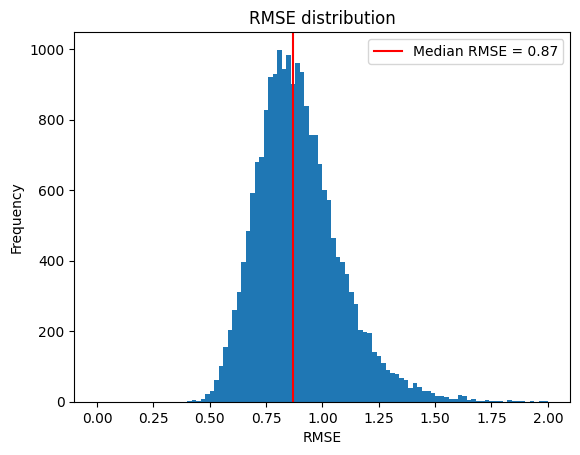

In [ ]:
#Compute histogram of RMSEs
import matplotlib.pyplot as plt
plt.hist(list(RMSEs.values()), bins = 100, range = (0,2))
#add median RMSE
median_RMSE = np.median(list(RMSEs.values()))
plt.axvline(median_RMSE, color = "red", label = f"Median RMSE = {median_RMSE:.2f}")
plt.legend()
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.title("RMSE distribution")
#parent directory
plt.savefig("RMSE.png", dpi = 600)
plt.show()

In [ ]:
#Compute similarity matrix
similarity_matrix = np.zeros((len(users), len(users)))
for i, user1 in tqdm(enumerate(users.values())):
    for j, user2 in enumerate(users.values()):
        if i < j:
            similarity_matrix[i,j] = user1.similarity(user2, method = "jaccard")
            similarity_matrix[j,i] = similarity_matrix[i,j]
        if i == j:
            similarity_matrix[i,j] = 1

22it [00:27,  1.26s/it]


KeyboardInterrupt: 